In [1]:
addprocs(2)
using PyPlot
using AffineTransforms
using MappingRobots

In [2]:
@everywhere hostnames = ["192.168.1.18", "192.168.1.17"]
@everywhere initial_poses = [AffineTransforms.tformeye(2), 
    AffineTransforms.tformtranslate([3.0, 0.0]) *
    AffineTransforms.tformrotate(pi/2)]

In [3]:
maps = @sync @parallel (vcat) for i = 1:1
    robot = MappingRobots.construct_remote_robot(hostnames[i])
    MappingRobots.run_mapping(robot, timeout=5, initial_pose=initial_poses[i])
end
nothing # suppress printout

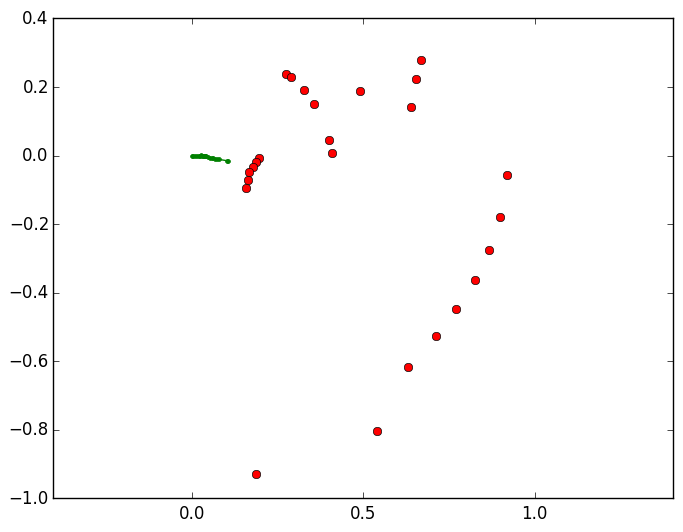

In [4]:
function draw(m::Map)
    plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
    plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
    axis("equal")
end

cla()
hold(true)
for m in vcat(maps)
    draw(m)
end